In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")
df1 = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [108]:
df1.tail(15)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
81,1970-10,6424.0
82,1970-11,9842.0
83,1970-12,13076.0
84,1971-01,3934.0
85,1971-02,3162.0
86,1971-03,4286.0
87,1971-04,4676.0
88,1971-05,5010.0
89,1971-06,4874.0
90,1971-07,4633.0


In [3]:
pd.set_option('display.max_rows',1000)

In [107]:
df = df.iloc[0:96,:]
df1 = df1.iloc[0:96,:]

In [109]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [110]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace = True)
df1.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace = True)

In [111]:
df['Month'] = pd.to_datetime(df['Month'])
df1['Month'] = pd.to_datetime(df1['Month'])

In [7]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [112]:
df.head(5)

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [113]:
df.set_index('Month', inplace=True)
df1.set_index('Month', inplace=True)


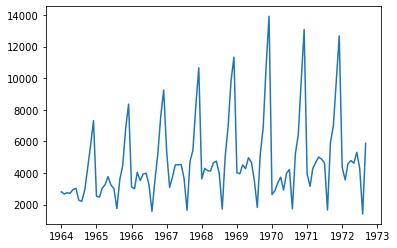

In [10]:
plt.plot(df)


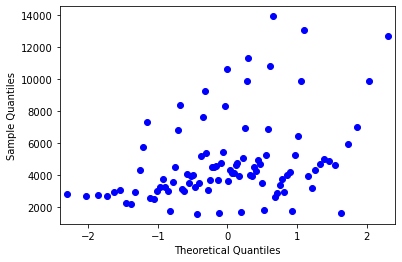

In [114]:
sm.qqplot(df)
plt.show()
#sm.qqplot(np.random.randn(1000))

In [115]:
results = seasonal_decompose(df,model='additive')
print(results.trend)
print(results.seasonal)
print(results.resid)
print(results.observed)

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01            NaN
1964-04-01            NaN
1964-05-01            NaN
1964-06-01            NaN
1964-07-01    3466.750000
1964-08-01    3447.125000
1964-09-01    3450.416667
1964-10-01    3484.625000
1964-11-01    3541.916667
1964-12-01    3584.583333
1965-01-01    3623.750000
1965-02-01    3635.958333
1965-03-01    3645.125000
1965-04-01    3680.375000
1965-05-01    3732.333333
1965-06-01    3820.625000
1965-07-01    3888.000000
1965-08-01    3933.958333
1965-09-01    3998.416667
1965-10-01    4051.458333
1965-11-01    4068.875000
1965-12-01    4107.083333
1966-01-01    4148.250000
1966-02-01    4150.166667
1966-03-01    4139.625000
1966-04-01    4167.541667
1966-05-01    4230.583333
1966-06-01    4300.291667
1966-07-01    4431.916667
1966-08-01    4529.583333
1966-09-01    4519.291667
1966-10-01    4546.875000
1966-11-01    4612.458333
1966-12-01    4659.791667
1967-01-01    4699.625000
1967-02-01    4719.333333
1967-0

In [116]:
df_reconstructed = pd.concat([results.seasonal,results.trend,results.resid,results.observed],axis=1)
df_reconstructed.columns = ['seas','trend','resid','actual_values']

In [117]:
df_reconstructed

,seas,trend,resid,actual_values
Month,,,,
1964-01-01,-1192.462798,NaN,NaN,2815.0
1964-02-01,-1542.022321,NaN,NaN,2672.0
1964-03-01,-951.474702,NaN,NaN,2755.0
1964-04-01,-842.599702,NaN,NaN,2721.0
1964-05-01,-644.450893,NaN,NaN,2946.0
1964-06-01,-663.528274,NaN,NaN,3036.0
1964-07-01,-1265.593750,3466.750000,80.843750,2282.0
1964-08-01,-2913.599702,3447.125000,1678.474702,2212.0
1964-09-01,-381.915179,3450.416667,-146.501488,2922.0


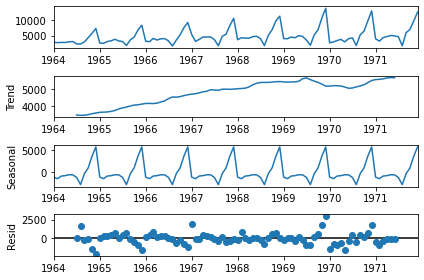

In [118]:
results.plot()
plt.show()

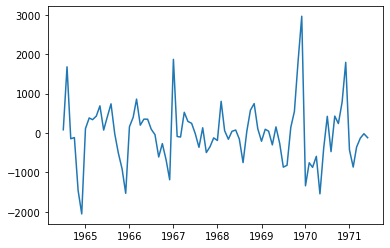

In [119]:
plt.plot(df_reconstructed['resid'])

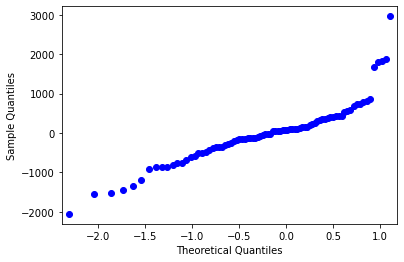

In [120]:
sm.qqplot(df_reconstructed['resid'])
plt.show()

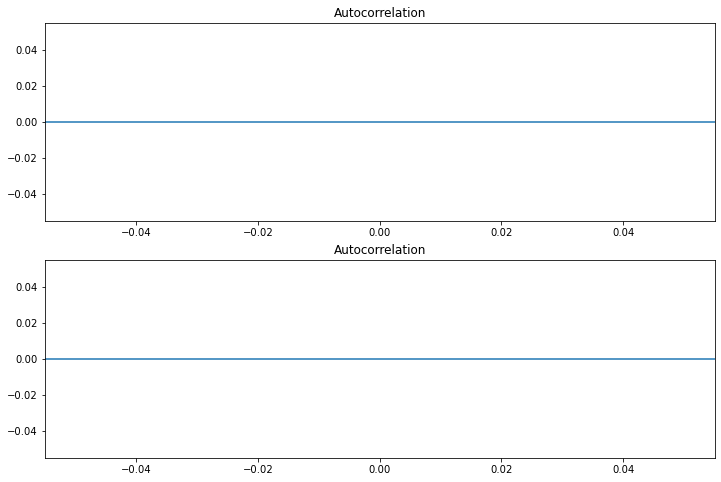

In [121]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_reconstructed.resid.values,lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(df_reconstructed.resid.values,lags=40,ax=ax2)

#plot_acf(df_reconstructed['resid'])
#plt.show()

In [122]:
#ADF Test

def adfuller_test(data):
    results = adfuller(data)
    labels = ['ADF test statistics', 'p-value','#Lags used','Num of obs used']
    #ADF test statistics, p-value,Lags used,Num of obs used = results
    for value , label in zip(results,labels):
        print(label +" : "+ str(value))
    if results[1] < 0.05:
        print("Rejecting the null hypothesis as Data is strong stationary")
    else:
        print("Failed to Reject the null hypothesis as Data is Weak stationary")



In [123]:
#KPSS Test

def kpss_test(data):
    results = kpss(data)
    labels = ['kpss test statistics', 'p-value','#Lags used','Num of obs used']
    #ADF test statistics, p-value,Lags used,Num of obs used = results
    for value , label in zip(results,labels):
        print(label +" : "+ str(value))
    if results[1] < 0.05:
        print("Failed to Reject the null hypothesis as Data is Weak stationary")
    else:
        print("Rejecting the null hypothesis as Data is strong stationary")




In [124]:
adfuller_test(df['Sales'])

ADF test statistics : -1.6205567758335164
p-value : 0.472437413623997
#Lags used : 11
Num of obs used : 84
Failed to Reject the null hypothesis as Data is Weak stationary


In [125]:
kpss_test(df['Sales'])

kpss test statistics : 0.8141124992339631
p-value : 0.01
#Lags used : 12
Num of obs used : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Failed to Reject the null hypothesis as Data is Weak stationary


### Since data is not stationary we need to make it stationary by removing trend and seasonality

In [126]:
df['Sales first diff'] = df['Sales'].shift(1)

In [127]:
df['Sales first diff'] = df['Sales'] - df['Sales first diff']

In [128]:
df['Sales seasonal diff'] = df['Sales'].shift(12)

In [129]:
df['Sales seasonal diff'] = df['Sales'] - df['Sales seasonal diff']

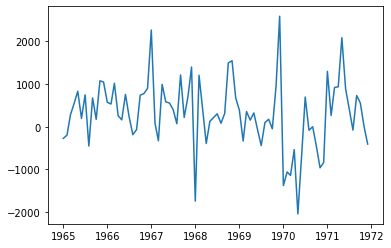

In [130]:
# Trend and seasonality is removed 
plt.plot(df['Sales seasonal diff'])


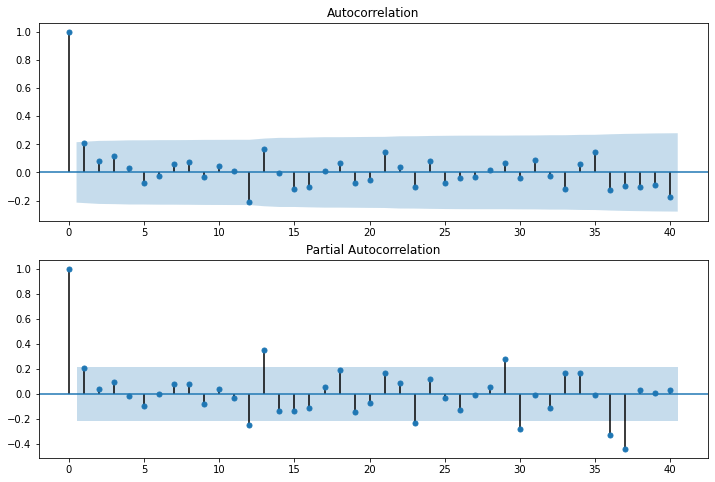

In [131]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales seasonal diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales seasonal diff'].iloc[13:],lags=40,ax=ax2)


In [132]:
train_data = df['1964-01-01' : '1970-12-01']
test_data = df['1971-01-01' : '1971-12-01']

In [29]:
model = ARIMA(df['Sales seasonal diff'].dropna(),order=(1,1,1))
modelfit = model.fit()

In [30]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.Sales seasonal diff   No. Observations:                   92
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -739.804
Method:                          css-mle   S.D. of innovations            735.101
Date:                   Thu, 02 Jul 2020   AIC                           1487.607
Time:                           21:59:22   BIC                           1497.695
Sample:                       02-01-1965   HQIC                          1491.679
                            - 09-01-1972                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.8757      3.531     -1.381      0.167     -11.795       2.044
ar.L1.D.Sales seasonal diff     0.2021      0.103      1.957      0.050      -0.000       0.405
ma.L1.D.Sales seasonal diff    -0.9999      0.033    -30.266      0.000      -1.065      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9474           +0.0000j            4.9474            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

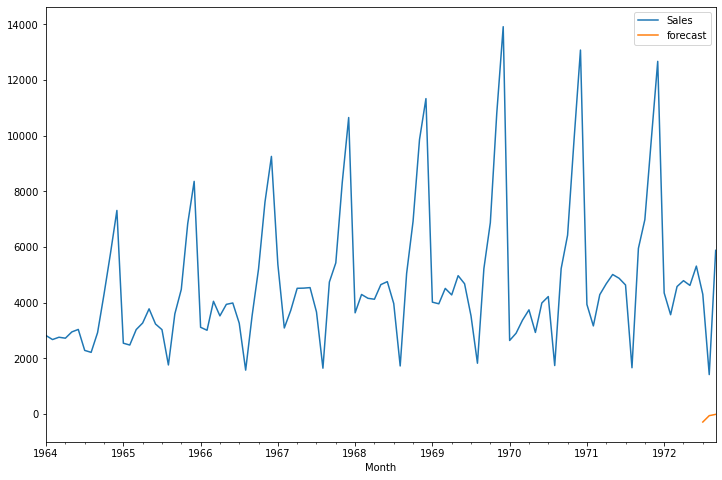

In [31]:
df['forecast'] = modelfit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [66]:
aic = []
for p in range(1,5):
    for d in range(1,3):
        for q in range(1,5):
            try:
                model = ARIMA(train_data['Sales'] ,order=(p,d,q))
                model_fit = model.fit()
                aic.append(model_fit.aic)
                print("P : {} d: {} q:{}  AIC:{} ".format(p,d,q,model_fit.aic))
            except:
                continue
print("MIN AIC : {}".format(min(aic)))             
  

P : 1 d: 1 q:1  AIC:1519.7241271735245 
P : 1 d: 1 q:2  AIC:1516.1606617374182 
P : 1 d: 1 q:3  AIC:1512.1544923210872 
P : 1 d: 1 q:4  AIC:1514.358521994849 
P : 1 d: 2 q:1  AIC:1524.5416008650138 
P : 2 d: 1 q:1  AIC:1514.8867428894312 
P : 2 d: 1 q:2  AIC:1515.811109917731 
P : 2 d: 1 q:4  AIC:1499.501113886897 
P : 2 d: 2 q:1  AIC:1523.7450715489747 
P : 3 d: 1 q:1  AIC:1514.807470082849 
P : 3 d: 1 q:2  AIC:1505.252971868639 
P : 3 d: 2 q:1  AIC:1524.316232376716 
P : 3 d: 2 q:3  AIC:1509.7573473252216 
P : 3 d: 2 q:4  AIC:1507.2156573000277 
P : 4 d: 1 q:1  AIC:1525.1604669287694 
P : 4 d: 1 q:2  AIC:1509.311862661508 
P : 4 d: 2 q:1  AIC:1513.7517582845824 
P : 4 d: 2 q:2  AIC:1508.0751500617248 
MIN AIC : 1499.501113886897


In [1]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

NameError: name 'sm' is not defined

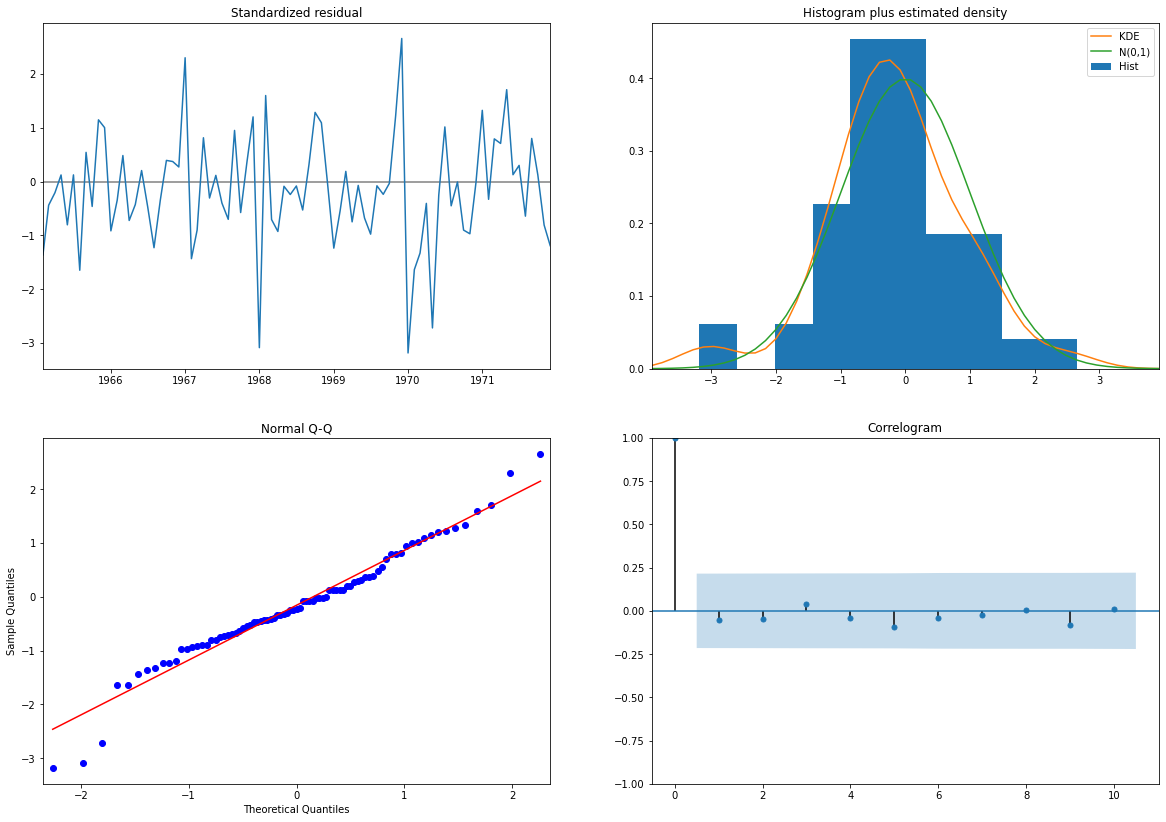

In [134]:
result.plot_diagnostics(figsize=(20,14))
plt.show()

In [135]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -669.281
Date:                            Fri, 03 Jul 2020   AIC                           1348.562
Time:                                    00:37:05   BIC                           1360.656
Sample:                                01-01-1964   HQIC                          1353.420
                                     - 12-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3017      0.090      3.344      0.001       0.125       0.479
ma.L1         -0.9457      0.050    -18.911      0.000      -1.044      -0.848
ar.S.L12      -0.5610      0.288     -1.950      0.051      -1.125       0.003
ma.S.L12       0.3308      0.296      1.116      0.264      -0.250       0.912
sigma2      5.384e+05   7.09e+04      7.598      0.000       4e+05    6.77e+05
===================================================================================
Ljung-Box (Q):                       41.84   Jarque-Bera (JB):                 5.27
Prob(Q):                              0.39   Prob(JB):                         0.07
Heteroskedasticity (H):               2.01   Skew:                            -0.18
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

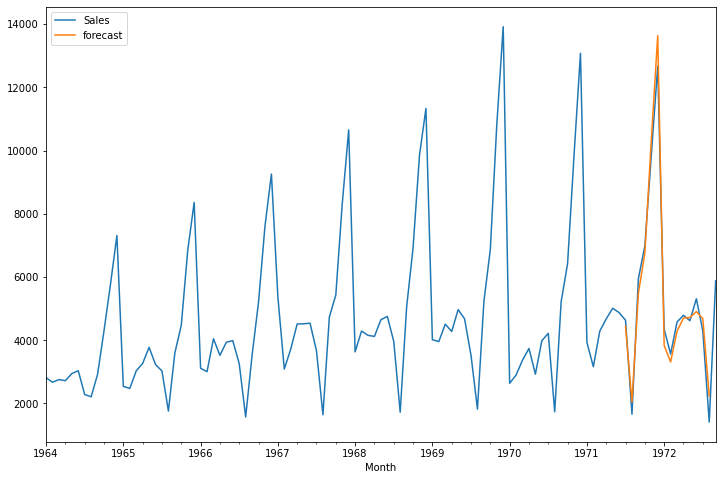

In [70]:
df['forecast'] = result.predict(start=90, end=103, dynamic = True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [136]:
pred1 = result.get_prediction(start='1969-01-01',end='1970-12-01',dynamic=True)
pred1_ci = pred1.conf_int()
#pred1_ci

In [137]:
pred2 =result.get_forecast('1975-12-01')
pred2_ci = pred2.conf_int()
pred2_ci

,lower Sales,upper Sales
1972-01-01,1939.220888,4815.634863
1972-02-01,1589.598995,4642.868804
1972-03-01,2577.591822,5666.086356
1972-04-01,3013.854631,6116.545407
1972-05-01,2971.095515,6083.489267
1972-06-01,3221.839765,6342.735926
1972-07-01,3200.999759,6330.037738
1972-08-01,263.347966,3400.406397
1972-09-01,4368.102930,7513.131305
1972-10-01,5419.132191,8572.101314


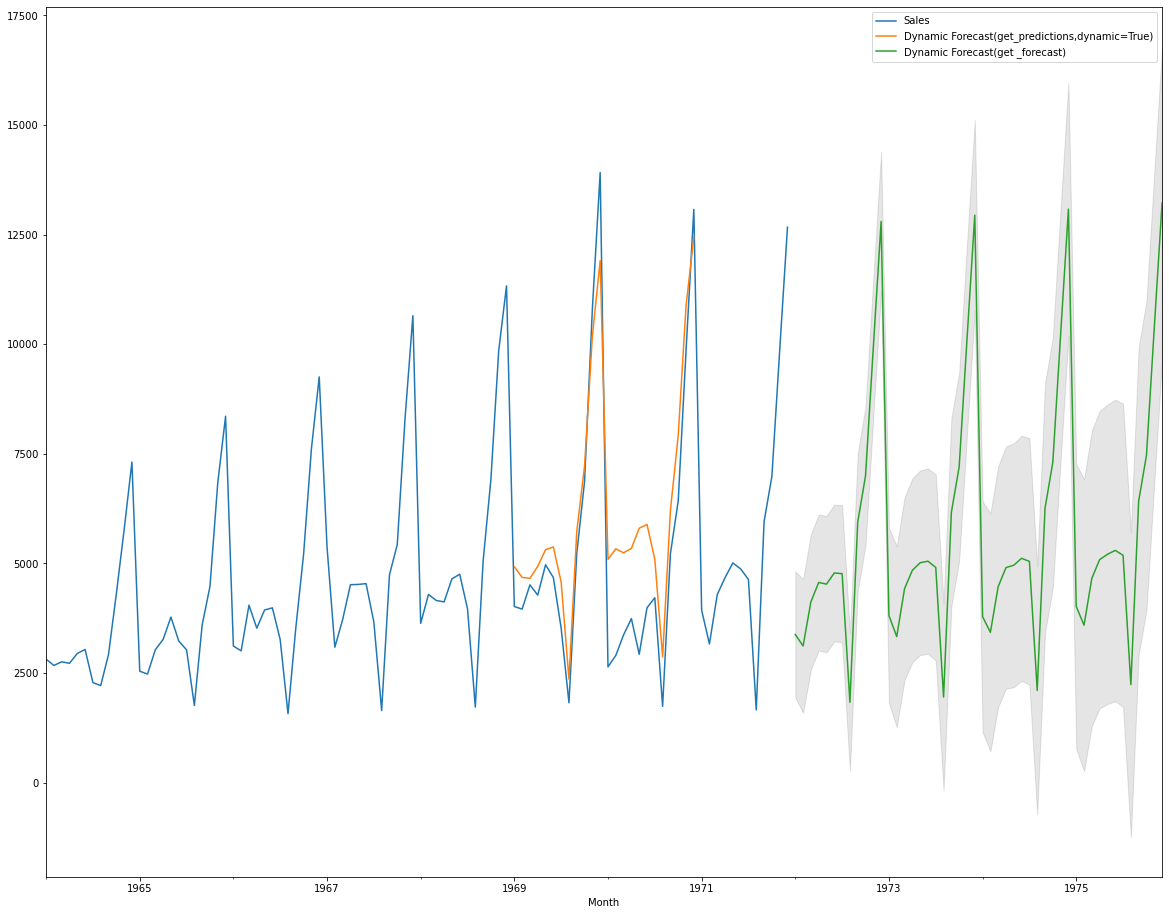

In [138]:
ax = df1.plot(figsize=(20,16))
#pred0.predicted_mean.plot(ax=ax,label='1-step-ahead Forecast(get_predictions,dynamic=False)')
pred1.predicted_mean.plot(ax=ax,label='Dynamic Forecast(get_predictions,dynamic=True)')
pred2.predicted_mean.plot(ax=ax,label='Dynamic Forecast(get _forecast)')
ax.fill_between(pred2_ci.index,pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=0.1)
plt.legend()
plt.show()

In [65]:
train_data

,Sales,Sales first diff,Sales seasonal diff,forecast
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN


In [86]:
train_data

,Sales,Sales first diff,Sales seasonal diff,forecast
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN
